<a href="https://colab.research.google.com/github/Aqibkhan037/Artificial-intelligence/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**
*   Importing Libraries
*   Data Understanding
*   Data Preparation
*   Data Imputation

## Import Libraries
Let's import some libraries to get started!

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
titanic = sns.load_dataset('titanic')
titanic.to_csv('Titanic-Dataset.csv')

## Data Understanding

*   Dataframe shape
*   Head and Tail
*   Data Types
*   Describe

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [4]:
train = pd.read_csv('Titanic-Dataset.csv')

In [5]:
train.shape

(891, 16)

In [6]:
train.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
train.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
train.dtypes

,0
Unnamed: 0,int64
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,object


In [9]:
train.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.nunique()

,0
Unnamed: 0,891
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3


In [12]:
train['sex'].unique()

array(['male', 'female'], dtype=object)

##Feature Understanding

*   Plotting Feature Distributions

  *   Barchart (Categorical Data)
  *   Histogram (Numerical Data)
  *   Boxplot (Numerical Data)

Let's check the frequency of survived and not survived people in the dataset.

<ipython-input-13-e684f917faaf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived',data=train,palette='rainbow')


<Axes: xlabel='survived', ylabel='count'>

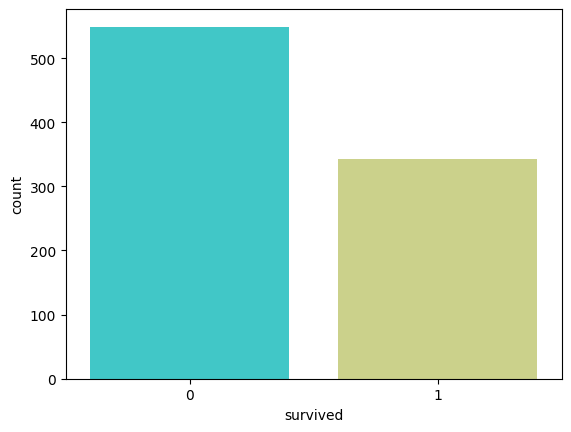

In [13]:
sns.countplot(x='survived',data=train,palette='rainbow')

<Axes: xlabel='survived', ylabel='count'>

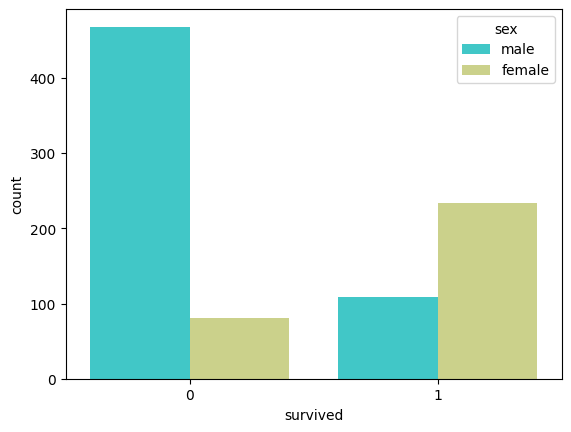

In [14]:
sns.countplot(x='survived',hue='sex',data=train,palette='rainbow')

<Axes: xlabel='survived', ylabel='count'>

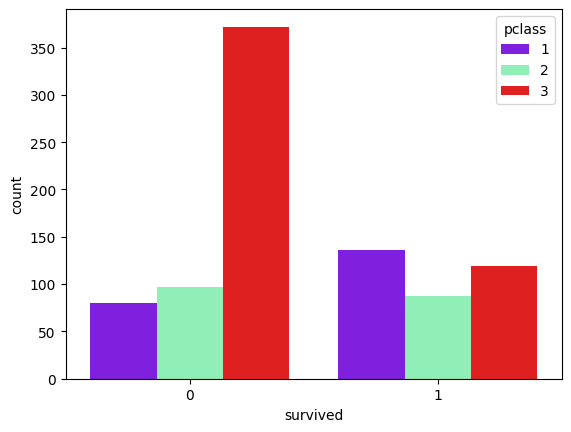

In [15]:
sns.countplot(x='survived',hue='pclass',data=train,palette='rainbow')

<ipython-input-18-a26c80a9e07e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sibsp',data=train,palette='rainbow')


<Axes: xlabel='sibsp', ylabel='count'>

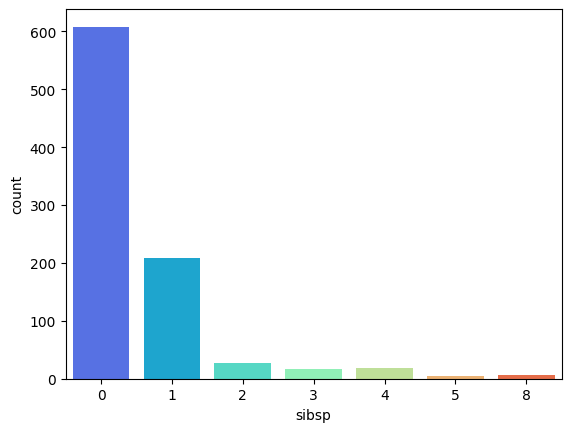

In [18]:
sns.countplot(x='sibsp',data=train,palette='rainbow')

<Axes: xlabel='age', ylabel='Count'>

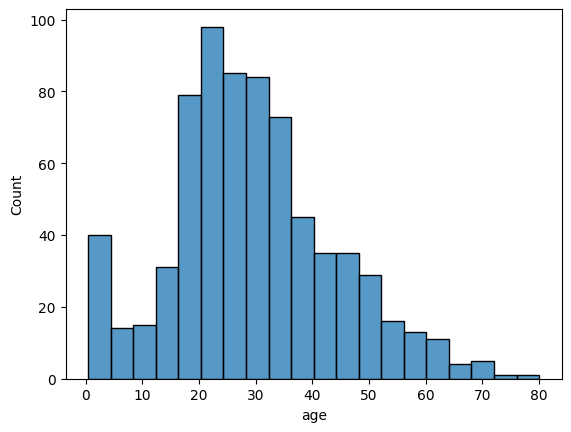

In [20]:
sns.histplot(train['age'])

<Axes: >

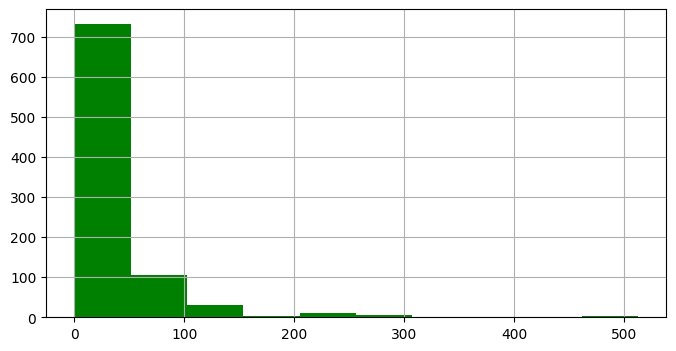

In [21]:
train['fare'].hist(color='green', figsize=(8,4))

<Axes: xlabel='age', ylabel='Count'>

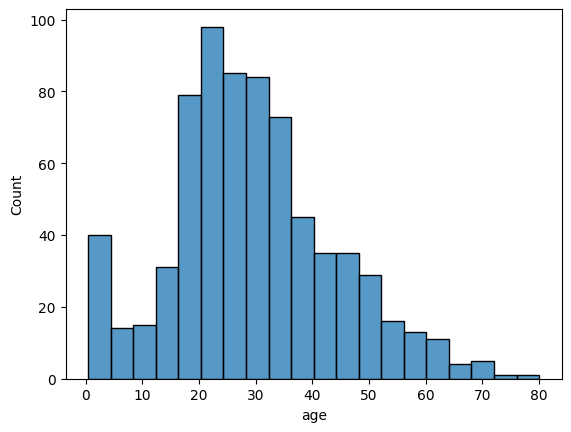

In [22]:
sns.histplot(train['age'])

<Axes: xlabel='pclass', ylabel='age'>

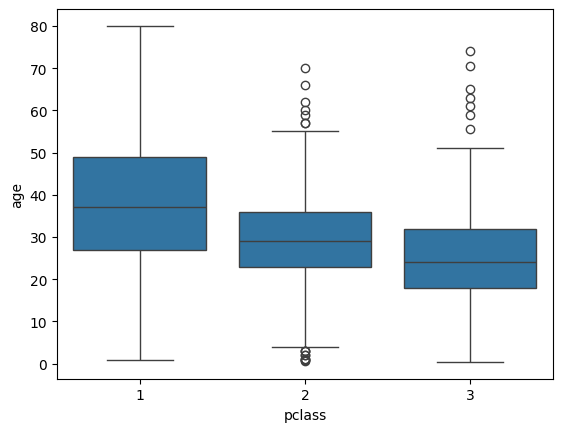

In [24]:
sns.boxplot(y='age', x='pclass', data=train)

<Axes: ylabel='age'>

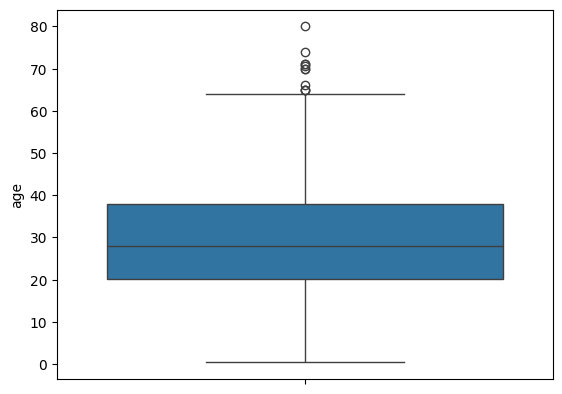

In [25]:
sns.boxplot(y='age', data=train)

# **Outlier Removal**

In [27]:
train=train[train['age'] < 66]

<Axes: ylabel='age'>

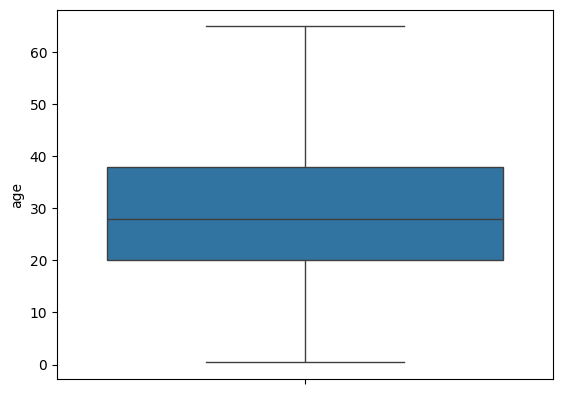

In [28]:
sns.boxplot(y='age', data=train)

In [29]:
train.shape

(706, 16)

##Data Preparation

*   Dropping irrelevant columns and rows
*   Handling Missing Values
*   Identifying duplicated columns
*   Renaming Columns


Let's begin some exploratory data analysis! We'll start by dropping irrelevant columns

In [32]:
train.drop(['embarked'],axis=1,inplace=True)

<ipython-input-32-2aef9f1e9028>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['embarked'],axis=1,inplace=True)


In [33]:
train.shape

(706, 15)

In [34]:
train.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [35]:
train.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True


## Data Imputation
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

In [36]:
train.isnull().sum()

,0
Unnamed: 0,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
class,0
who,0


In [37]:
train.isnull()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

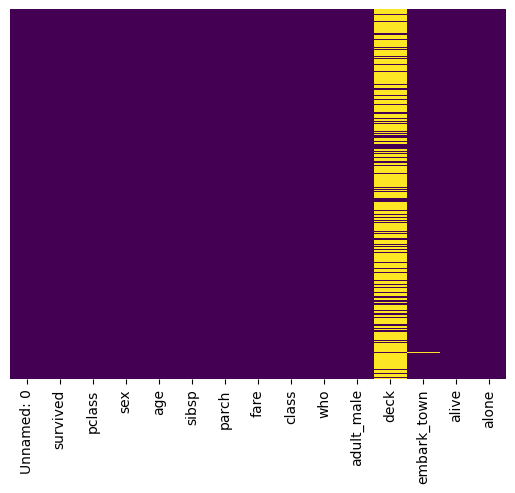

In [38]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
train.drop('deck',axis=1,inplace=True)

<ipython-input-40-d4f24ed12921>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('deck',axis=1,inplace=True)


In [41]:
train.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [44]:
#sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
mean_values = train.groupby('pclass')['age'].mean()
print(mean_values)

pclass
1    37.469341
2    29.431754
3    24.873711
Name: age, dtype: float64


<Axes: >

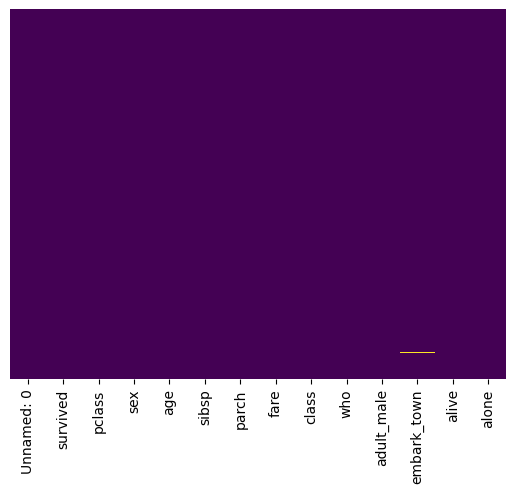

In [42]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [45]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [48]:
train['Age'] = train[['age','pclass']].apply(impute_age,axis=1)

<ipython-input-45-b8fc05cf2ef4>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-45-b8fc05cf2ef4>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]
<ipython-input-48-71ac3d3dcb35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = train[['age','pclass']].apply(impute_age,axis=1)


Now let's check that heat map again!

<Axes: >

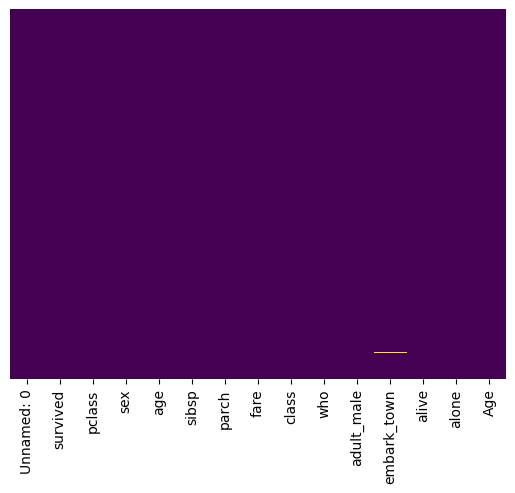

In [49]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Identifying Duplicated Columns**

In [55]:
train.loc[train.duplicated()]

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,Age


In [57]:
train.loc[train.duplicated(subset=['pclass'])]

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,Age
2,2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,26.0
3,3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,35.0
4,4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,35.0
6,6,0,1,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True,54.0
7,7,0,3,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,3,female,39.0,0,5,29.1250,Third,woman,False,Queenstown,no,False,39.0
886,886,0,2,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,27.0
887,887,1,1,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,19.0
889,889,1,1,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,26.0


In [60]:
# Checking an example duplicate
train.query('pclass == 1')

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,Age
1,1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,38.0
3,3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,35.0
6,6,0,1,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True,54.0
11,11,1,1,female,58.0,0,0,26.5500,First,woman,False,Southampton,yes,True,58.0
23,23,1,1,male,28.0,0,0,35.5000,First,man,True,Southampton,yes,True,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,871,1,1,female,47.0,1,1,52.5542,First,woman,False,Southampton,yes,False,47.0
872,872,0,1,male,33.0,0,0,5.0000,First,man,True,Southampton,no,True,33.0
879,879,1,1,female,56.0,0,1,83.1583,First,woman,False,Cherbourg,yes,False,56.0
887,887,1,1,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,19.0


##Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   706 non-null    int64  
 1   survived     706 non-null    int64  
 2   pclass       706 non-null    int64  
 3   sex          706 non-null    object 
 4   age          706 non-null    float64
 5   sibsp        706 non-null    int64  
 6   parch        706 non-null    int64  
 7   fare         706 non-null    float64
 8   class        706 non-null    object 
 9   who          706 non-null    object 
 10  adult_male   706 non-null    bool   
 11  embark_town  704 non-null    object 
 12  alive        706 non-null    object 
 13  alone        706 non-null    bool   
 14  Age          706 non-null    float64
dtypes: bool(2), float64(3), int64(5), object(5)
memory usage: 78.6+ KB


In [63]:
sex = pd.get_dummies(train['sex'],dtype=int)

In [64]:
train.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,Age
0,0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,22.0
1,1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,38.0
2,2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,26.0
3,3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,35.0
4,4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,35.0


In [65]:
train = pd.concat([train,sex],axis=1)

In [74]:
train.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,Age,female,male
0,0,0,3,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,22.0,0,1
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,38.0,1,0
2,2,1,3,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,26.0,1,0
3,3,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,35.0,1,0
4,4,0,3,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,35.0,0,1


In [73]:
train.drop(['sex'],axis=1,inplace=True)

In [75]:
train.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,Age,female,male
0,0,0,3,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,22.0,0,1
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,38.0,1,0
2,2,1,3,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,26.0,1,0
3,3,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,35.0,1,0
4,4,0,3,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,35.0,0,1


In [76]:
train = train.rename(columns={'male':'Male'})

In [81]:
train = train.rename(columns={'female':'Female'})

In [82]:
train.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,Age,Female,Male
0,0,0,3,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,22.0,0,1
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,38.0,1,0
2,2,1,3,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,26.0,1,0
3,3,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,35.0,1,0
4,4,0,3,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,35.0,0,1


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   706 non-null    int64  
 1   survived     706 non-null    int64  
 2   pclass       706 non-null    int64  
 3   age          706 non-null    float64
 4   sibsp        706 non-null    int64  
 5   parch        706 non-null    int64  
 6   fare         706 non-null    float64
 7   class        706 non-null    object 
 8   who          706 non-null    object 
 9   adult_male   706 non-null    bool   
 10  embark_town  704 non-null    object 
 11  alive        706 non-null    object 
 12  alone        706 non-null    bool   
 13  Age          706 non-null    float64
 14  Female       706 non-null    int64  
 15  Male         706 non-null    int64  
dtypes: bool(2), float64(3), int64(7), object(4)
memory usage: 100.3+ KB


# Lab Task

Perform the steps mentioned above on the following datasete

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease